## Classifiers

In this chapter we will be taking a look at classification models. As an alternative to regression models that we have looked at in previous chapters, classification models apply some predicted label to a sample.

We will look at some ways of measuring performance for classification models, and at an example from the influencer categorization project.


### Get the Data!

In [3]:
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

PROJECT_ROOT = os.path.split(os.getcwd())[0]
sys.path.append(PROJECT_ROOT)

from datasets import load_country_classifier_data

df = load_country_classifier_data()
df.head()

,Unnamed: 0,bio_cities_argentina,bio_cities_australia,bio_cities_austria,bio_cities_belgium,bio_cities_brazil,bio_cities_canada,bio_cities_chile,bio_cities_china,bio_cities_czech_republic,...,p_sweden,p_switzerland,p_taiwan,p_thailand,p_turkey,p_ukraine,p_united_kingdom,p_usa,p_vietnam,uncertainty
0,0,0,0,0,0,0,0,0,0,0,...,2.040181e-51,8.181474e-38,1.224942e-44,3.393799e-39,2.704039e-45,1.732408e-41,5.719952e-28,2.728579e-31,5.287985e-50,7.269740e-13
1,1,0,0,0,0,0,0,0,0,0,...,7.890450e-50,2.126728e-36,7.822874e-44,1.228205e-37,5.809402e-44,6.177244e-40,1.823821e-26,1.033266e-28,2.054601e-48,8.176884e-09
2,2,0,0,0,0,0,0,0,0,0,...,2.325071e-43,4.135771e-29,1.582463e-36,6.639052e-31,2.980702e-37,1.453615e-33,4.077144e-20,1.503103e-23,3.739123e-42,0.000000e+00
3,3,0,0,0,0,0,0,0,0,0,...,3.110596e-35,3.247361e-22,8.501046e-29,4.403305e-23,7.351352e-30,7.516327e-26,1.081132e-11,2.283812e-14,4.716011e-34,4.962489e-05
4,4,0,0,0,0,0,0,0,0,0,...,1.018796e-41,1.846566e-28,3.340965e-35,1.408269e-29,2.716121e-36,2.535026e-33,2.031685e-17,3.038128e-21,5.069687e-41,3.594902e-13


### Confusion Matrix

A confusion matrix is a great way to look at the performance of a classifier. Lets generate one for this case. This is a multiclass classifier. Predictions have already been applied and are in the columns starting p_

In [5]:
prediction_labels = [c for c in df.columns if c.startswith('p_')]

len(prediction_labels)

47

We can add the actual _prediction_ applied to each of these samples by taking the greatest of the scores of the individual binary classifiers. This is a _one versus all_ multiclass classifier.

The _true_ labels are in the _category_ column.

In [8]:
df['prediction'] = df[prediction_labels].idxmax(axis=1).apply(lambda x: x.replace('p_', ''))

df[['category', 'prediction']].head()

,category,prediction
0,argentina,argentina
1,argentina,argentina
2,argentina,argentina
3,argentina,spain
4,argentina,argentina


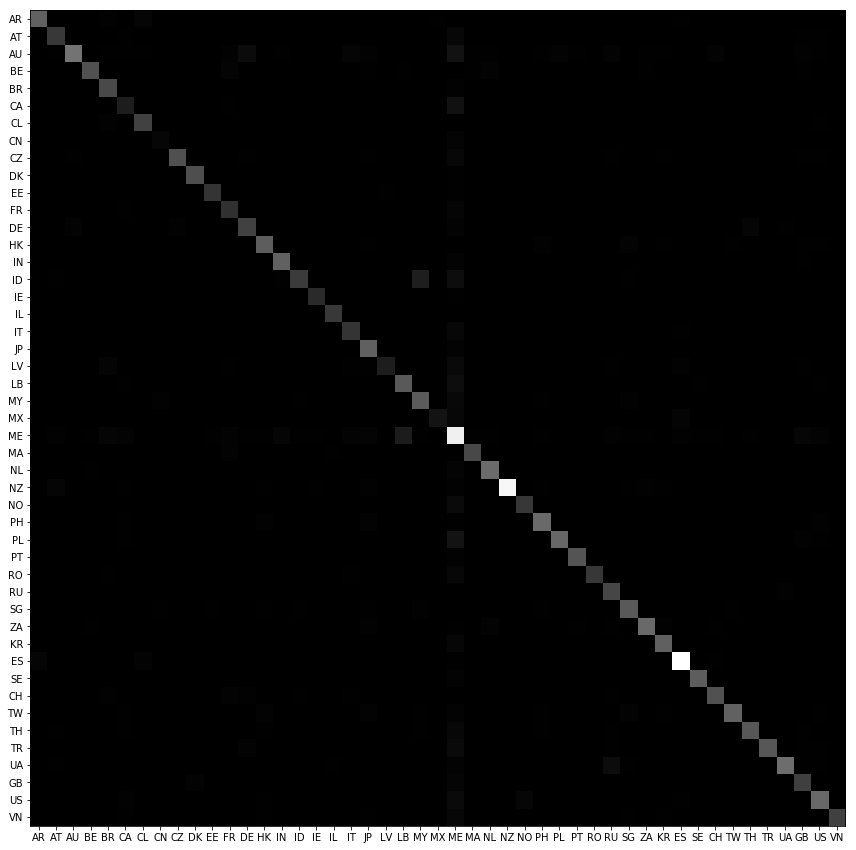

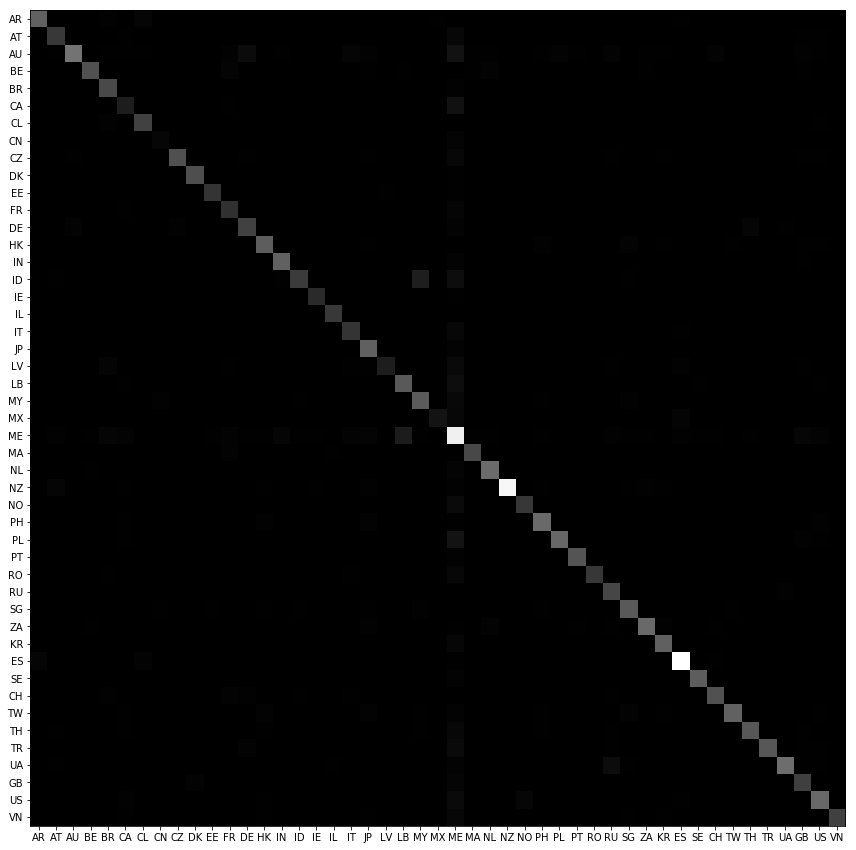

In [32]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

def class_to_label(kls):
    return {'argentina':'🇦🇷','australia':'🇦🇺','austria':'🇦🇹','belgium':'🇧🇪','brazil':'🇧🇷','canada':'🇨🇦','chile':'🇨🇱','china':'🇨🇳','czech_republic':'🇨🇿','denmark':'🇩🇰','estonia':'🇪🇪','france':'🇫🇷','germany':'🇩🇪','hong_kong':'🇭🇰','india':'🇮🇳','indonesia':'🇮🇩','ireland':'🇮🇪','israel':'🇮🇱','italy':'🇮🇹','japan':'🇯🇵','latvia':'🇱🇻','lebanon':'🇱🇧','malaysia':'🇲🇾','mexico':'🇲🇽','middle_east':None,'morocco':'🇲🇦','netherlands':'🇳🇱','new_zealand':'🇳🇿','norway':'🇳🇴','philippines':'🇵🇭','poland':'🇵🇱','portugal':'🇵🇹','romania':'🇷🇴','russia':'🇷🇺','singapore':'🇸🇬','south_africa':'🇿🇦','south_korea':'🇰🇷','spain':'🇪🇸','sweden':'🇸🇪','switzerland':'🇨🇭','taiwan':'🇹🇼','thailand':'🇹🇭','turkey':'🇹🇷','ukraine':'🇺🇦','united_kingdom':'🇬🇧','usa':'🇺🇸','vietnam':'🇻🇳'}[kls]

def class_to_label_boring(kls):
    return {'argentina': 'AR','australia': 'AT','austria': 'AU','belgium': 'BE','brazil': 'BR','canada': 'CA','chile': 'CL','china': 'CN','czech_republic': 'CZ','denmark': 'DK','estonia': 'EE','france': 'FR','germany': 'DE','hong_kong': 'HK','india': 'IN','indonesia': 'ID','ireland': 'IE','israel': 'IL','italy': 'IT','japan': 'JP','latvia': 'LV','lebanon': 'LB','malaysia': 'MY','mexico': 'MX','middle_east': 'ME','morocco': 'MA','netherlands': 'NL','new_zealand': 'NZ','norway': 'NO','philippines': 'PH','poland': 'PL','portugal': 'PT','romania': 'RO','russia': 'RU','singapore': 'SG','south_africa': 'ZA','south_korea': 'KR','spain': 'ES','sweden': 'SE','switzerland': 'CH','taiwan': 'TW','thailand': 'TH','turkey': 'TR','ukraine': 'UA','united_kingdom': 'GB','usa': 'US','vietnam': 'VN'}[kls]

conf_mx = confusion_matrix(df['category'], df['prediction'])

classes = df['category'].unique()

fig, ax = plt.subplots(figsize=(15, 15))
im = ax.imshow(conf_mx, interpolation='nearest', cmap=plt.cm.gray)

ax.set(
    xticks      = np.arange(conf_mx.shape[1]),
    yticks      = np.arange(conf_mx.shape[0]),
    xticklabels = [class_to_label_boring(kls) for kls in classes],
    yticklabels = [class_to_label_boring(kls) for kls in classes]
)

fig


Okay great, we can see the diagonal which represents the correctly classified samples, but we're more interested in the errors here. Let's remove the diagonal and normalize the rows by dividing by the total per class.

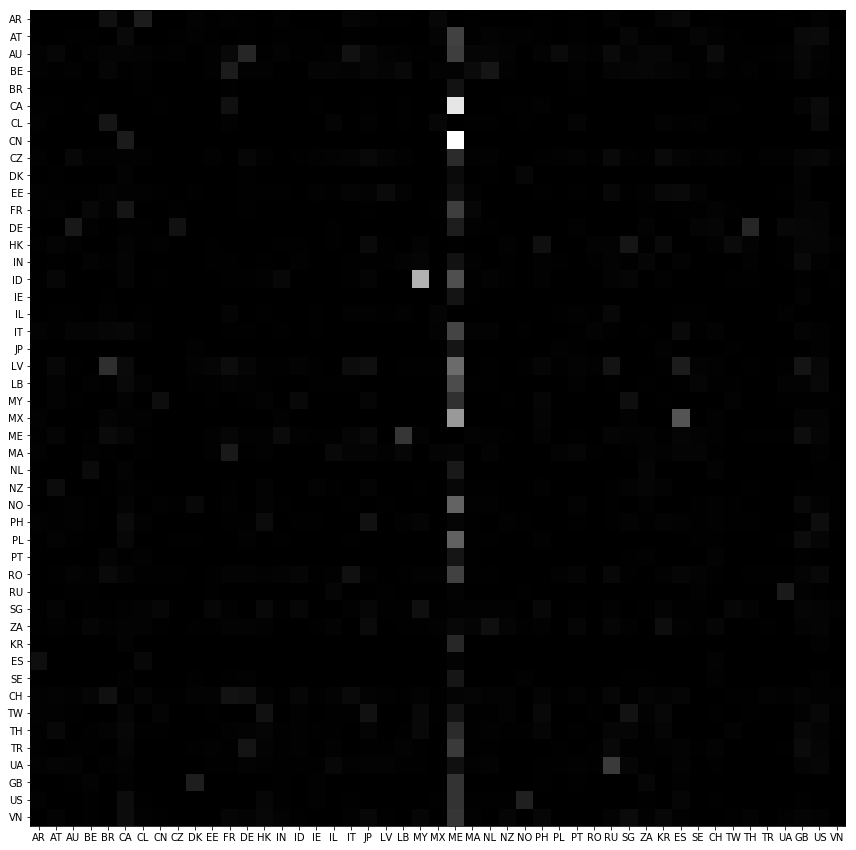

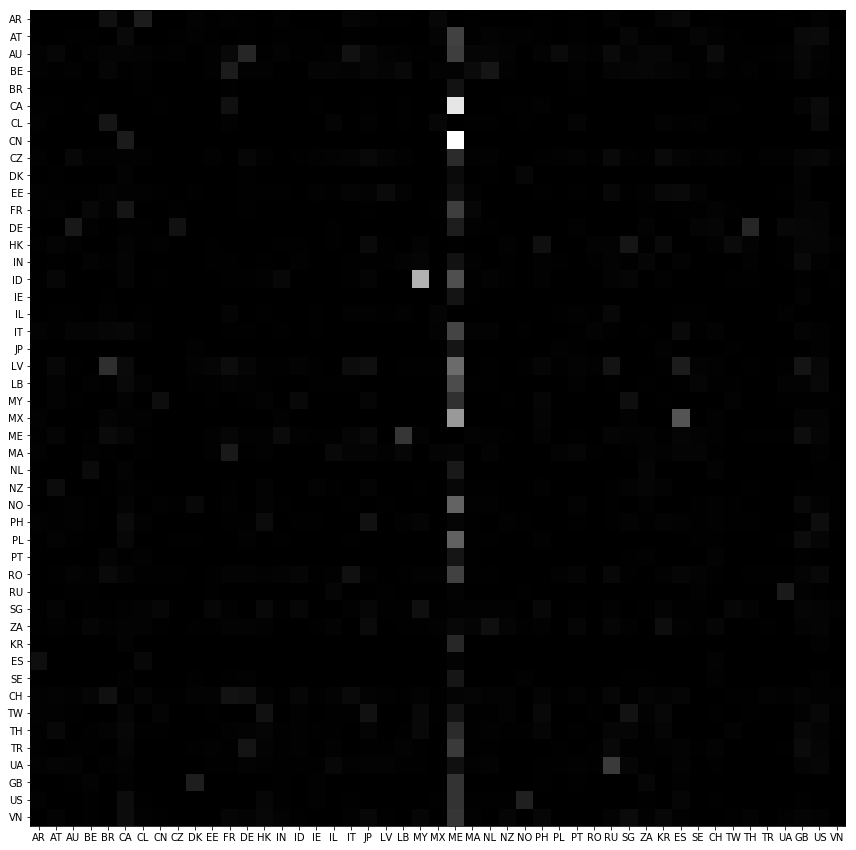

In [33]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

np.fill_diagonal(norm_conf_mx, 0)

classes = df['category'].unique()

fig, ax = plt.subplots(figsize=(15, 15))
im = ax.imshow(norm_conf_mx, interpolation='nearest', cmap=plt.cm.gray)

ax.set(
    xticks      = np.arange(norm_conf_mx.shape[1]),
    yticks      = np.arange(norm_conf_mx.shape[0]),
    xticklabels = [class_to_label_boring(kls) for kls in classes],
    yticklabels = [class_to_label_boring(kls) for kls in classes]
)

fig

Okay great, we can see the problem areas here. ME (Middle East) is clearly not performing well. There are also expected highlighted squares. MX <> ES (Mexico and Spain). While a single metric for performance is useful. Analysis like this can help us identify where the model is underperforming. 

From this matrix we can see that language is clearly a source of many of the errors, and countries that share a language are likely to be mislabelled.